In [2]:
import numpy as np
from sklearn.metrics import accuracy_score

### 有 3 种不同的 API 用于评估模型的质量 预测：
#估算器评分方法：估算器(Estimators )有一种方法提供 它们旨在解决的问题的默认评估标准。 本页不对此进行讨论，而是在每个估算器的文档中讨论。
#评分参数：使用交叉验证（例如model_selection.cross_val_score and model_selection.GridSearchCV）的模型评估工具依赖于内部评分策略。
#指标函数： sklearn.metrics 模块实现函数评估特定目的的预测误差。这些指标很详细定义了分类指标、多标签排名指标、回归指标和聚类指标。


In [3]:
### 3.3.1 分类指标
#sklearn.metrics模块实现了几个损失、分数和效用函数来衡量分类性能。一些度量可能需要正类的概率估计、置信值或二进制决策值。
#大多数实现允许每个样本通过sample_weight参数为总得分提供加权贡献。
#（1）accurcy准确率
#accurcy_score函数计算正确预测的精度，即分数（默认值）或计数（normalize=False）。

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred) #返回正确分类的样本比例

0.5

In [4]:
accuracy_score(y_true, y_pred, normalize=False) #normalize 参数用于控制是否对结果进行归一化处理，
                                                #如果设置为 False，则返回正确分类的样本数量；如果设置为 True，则返回正确分类的样本比例。

2.0

In [5]:
##（2）混淆矩阵
#混淆矩阵函数通过计算每行对应于真实类的混淆矩阵来评估分类精度
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred) #结果解释：第一行表示真实类别为 0 的样本，对应的预测结果为 0 的有 2 个样本，
                                 #预测结果为 2 的有 0 个样本，预测结果为 1 的有 0 个样本。二三行同理。
                                

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


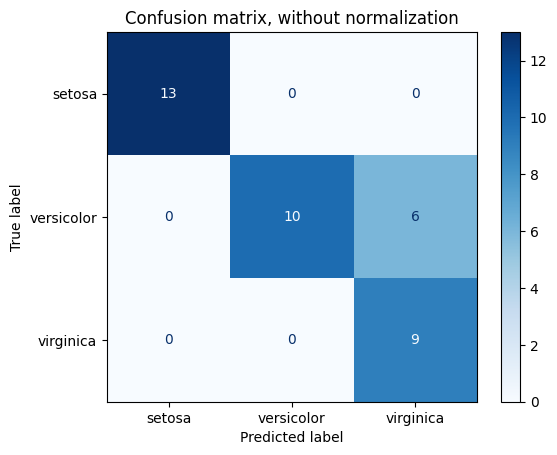

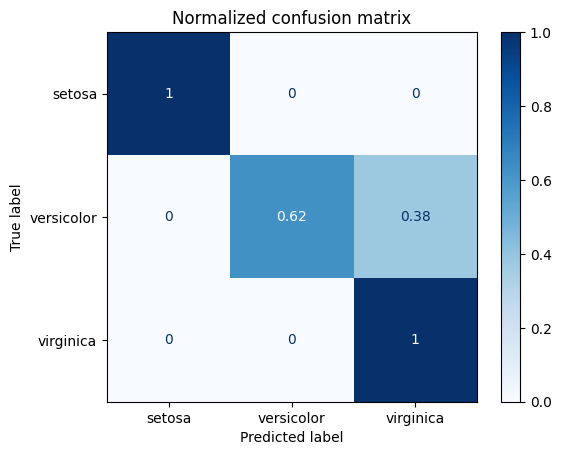

In [6]:
##<进阶> （3）混淆矩阵及可视化
# 注意归一化混淆矩阵和非归一化混淆矩阵的区别
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [7]:
##（3）分类报告
#该函数生成一个文本报告，显示 主要分类指标
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names)) #结果解释：分别列举了每个类precison、recall和f1-score和的分类指标，
                                              #support表示每个类别的样本数量
                                              #宏平均（macro avg）：各个类别指标的均值
                                              #weighted avg：各个类别指标的加权平均值，权重为各个类别的支持数。


              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



In [9]:
## （4）精确度Precision, 召回率recall and F-measures 指标
#直观地说，精度是分类器不将阴性样本标记为阳性的能力，而召回率是分类器找到所有阳性样本的能力。
#F值可以被解释为精确度和召回率的加权平均值，用于衡量召回率重要还是精确率重要。

# 二分类指标
from sklearn import metrics
y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]
print(metrics.precision_score(y_true, y_pred))        #精确率
print(metrics.recall_score(y_true, y_pred))           #召回率
print(metrics.f1_score(y_true, y_pred))               #F1，即精确率和召回率的平均值，给予两者相同的权重
print(metrics.fbeta_score(y_true, y_pred, beta=0.5))  #加权F，当 0<β<1 时，精确率（precision）的权重更大，意味着模型更侧重于减少假阳性（false positives）
print(metrics.fbeta_score(y_true, y_pred, beta=1))    #加权F，当 β>1 时，召回率（recall）的权重更大，意味着模型更侧重于减少假阴性（false negatives）
print(metrics.fbeta_score(y_true, y_pred, beta=2))    #加权F，当 β>1 时，召回率（recall）的权重更大，意味着模型更侧重于减少假阴性（false negatives）


1.0
0.5
0.6666666666666666
0.8333333333333334
0.6666666666666666
0.5555555555555556
(array([0.67, 1.  ]), array([1. , 0.5]), array([0.71, 0.83]), array([2, 2], dtype=int64))


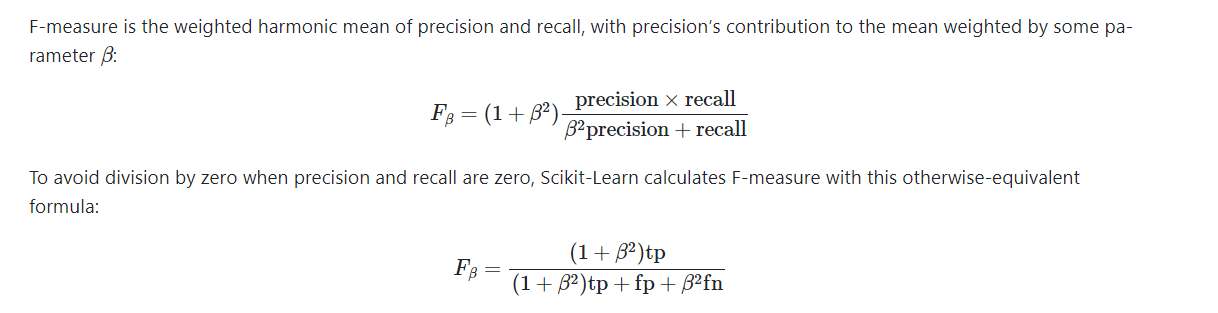

In [13]:
#<进阶> 多分类指标
#在多类别和多标签分类任务中，精度、召回率和F值的概念可以独立应用于每个标签。如上所述，有几种方法可以跨标签组合结果 ，
#例如average_precision_score, f1_score, fbeta_score, precision_recall_fscore_support, precision_score 和 recall_score。
#请注意，如果包括所有标签，在多类别设置中的“微”平均将产生精度、召回率和精度，这些都与准确率相同。

#宏平均：宏平均计算每个类别的指标（如精确率、召回率、F1 分数等），然后对所有类别的指标取平均值。
#微平均：微平均计算所有类别中的混淆矩阵的总体指标。
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2]  #3个类
y_pred = [0, 2, 1, 0, 0, 1]
print(metrics.precision_score(y_true, y_pred, average='macro'))       #宏平均precision
print(metrics.recall_score(y_true, y_pred, average='micro'))          #微平均recall
print(metrics.f1_score(y_true, y_pred, average='weighted'))           #加权平均F1
print(metrics.fbeta_score(y_true, y_pred, average='macro', beta=0.5)) #宏平均F值


0.2222222222222222
0.3333333333333333
0.26666666666666666
0.2380952380952381


In [ ]:
##<进阶> （5）更多指标
#Top-k准确率得分、平衡精度得分、Cohen’s kappa系数、Hamming损失等指标
#请参考https://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics

In [15]:
### 3.3.2 回归指标
#（1）R2指标
#R2指标表示由模型中的自变量解释的方差（y）的比例。它提供了拟合优度的指示，从而通过解释的方差的比例来衡量模型对未知样本的预测效果。
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

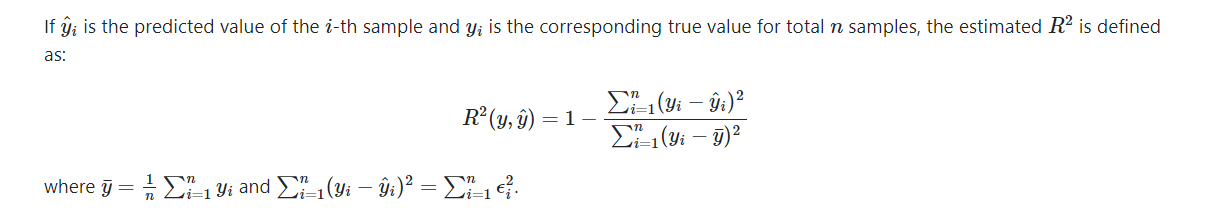

In [16]:
#（2）平均绝对误差 - MAE
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

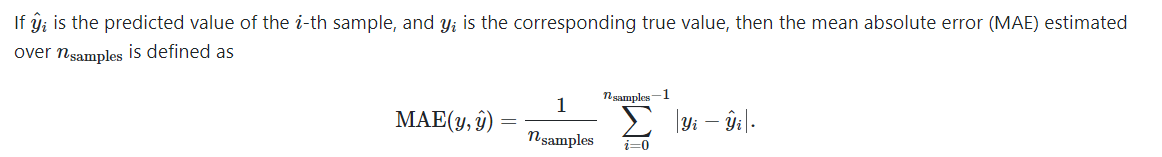

In [17]:
#（3）均方误差 -MSE
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

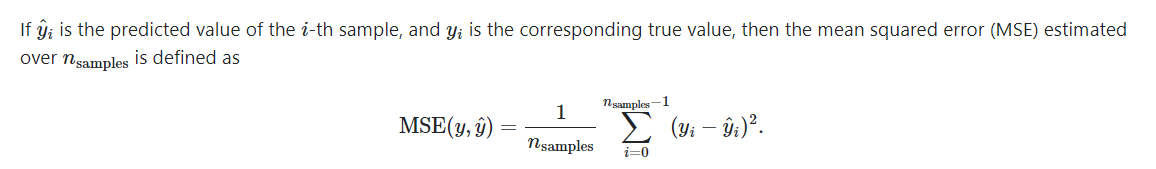

In [ ]:
##<进阶> （4）更多指标
#均方对数误差MSLE、平均绝对百分比误差MAPE、中值绝对误差MeaAE、 最大误差MaxError
#请参考https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [18]:
### 3.3.3 聚类指标
#评估聚类算法并不像评价分类精确率、召回率指标那么简单。
#任何评估指标都不应考虑聚类标签的绝对值，而是应该考虑这种聚类是否定义了数据的分离，
#即属于同一类的成员比根据某些相似度度量属于不同类的成员更相似。

#（1）兰德指数 - Adjusted Rand Index，ARI
#用于评估聚类结果与真实标签之间的相似性，值越大表示聚类结果与真实标签的相似性越高。
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.rand_score(labels_true, labels_pred)

0.6666666666666666

In [19]:
#（2）互信息 - Mutual Information
#用于评估聚类结果与真实标签之间的一致性，值越大表示聚类结果与真实标签的一致性越高。
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.adjusted_mutual_info_score(labels_true, labels_pred)  

0.2987924581708901

In [ ]:
#<进阶>（3）更多指标
#轮廓图（Silhouette Plot）、轮廓系数（Silhouette Score）和Fowlkes-Mallows指数等
#请参考https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation